<a href="https://colab.research.google.com/github/Rishiatweb/Bioinformatics_CDD/blob/main/Bioinformatics_1ext_hyperparameter_tune_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 6.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
#targeting for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
# Corrected the capitalization of DataFrame
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,[],Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,694009
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,[],Severe acute respiratory syndrome-related coro...,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,694009
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [ ]:
single_proteins = targets[targets['target_type'] == 'SINGLE PROTEIN']
single_proteins

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
6,[],Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,694009
8,[],Severe acute respiratory syndrome-related coro...,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,694009
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [ ]:
selected_target1 = targets.target_chembl_id[6]
selected_target2 = targets.target_chembl_id[8]
selected_target3 = targets.target_chembl_id[9]
selected_target1

'CHEMBL3927'

In [ ]:
activity = new_client.activity
res1 = activity.filter(target_chembl_id=selected_target1).filter(standard_type="IC50")
#res1 = activity.filter(target_chembl_id=selected_target2).filter(standard_type="IC50")
#res1 = activity.filter(target_chembl_id=selected_target3).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res1)


In [ ]:
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.5


In [ ]:
df.standard_value
df[['standard_value', 'assay_chembl_id', 'assay_description']].head(3)
#the lower the number the lower the concentration tp achieve the result the better

,standard_value,assay_chembl_id,assay_description
0,7200.0,CHEMBL829584,In vitro inhibitory concentration against SARS...
1,9400.0,CHEMBL829584,In vitro inhibitory concentration against SARS...
2,13500.0,CHEMBL830868,In vitro inhibitory concentration against SARS...


In [ ]:
#Filter out unique identifier data types(there may be combinations of )
df.standard_type.unique()

array(['IC50'], dtype=object)

In [ ]:
df.to_csv('bioactivity_data.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p "/content/drive/MyDrive/Bioactivity/data1"

In [ ]:
!cp bioactivity_data.csv "/content/drive/MyDrive/Bioactivity/data1"

In [ ]:
!ls "/content/drive/MyDrive/Bioactivity/data1"

bioactivity_data.csv  bioactivity_preprocessed_data.csv


In [ ]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516041,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,pIC50,None,UO_0000065,None,6.42
243,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516042,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,0.165
244,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516043,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,0.161
245,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516044,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,pIC50,None,UO_0000065,None,6.78


In [ ]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [ ]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

In [ ]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

In [ ]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

In [ ]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3= pd.DataFrame(data_tuples, columns = ['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,380.19
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.0
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,161.0
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.96


In [ ]:
df3.to_csv('bioactivity_preprocessed_data.csv', index=False)
!cp bioactivity_preprocessed_data.csv "/content/drive/MyDrive/Bioactivity/data1"

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-07-01 16:32:29--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   126MB/s    in 0.6s    

2025-07-01 16:32:30 (126 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

In [ ]:
!pip install rdkit

     |████████████████████████████████| 29.5 MB 1.3 MB/s 


In [ ]:
import pandas as pd
df = pd.read_csv('bioactivity_preprocessed_data.csv')
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
240,328.466,3.34562,1.0,5.0
241,222.379,-1.99300,1.0,3.0
242,485.559,0.54470,5.0,7.0
243,222.379,-1.99300,1.0,3.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.00
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.00
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.00
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.00
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.00
...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,380.19
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.00
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,161.00
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.96


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.00,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.00,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.00,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.00,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.00,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,380.19,328.466,3.34562,1.0,5.0
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.00,222.379,-1.99300,1.0,3.0
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,161.00,485.559,0.54470,5.0,7.0
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.96,222.379,-1.99300,1.0,3.0


Generating IC50 vs pIC50 plot...


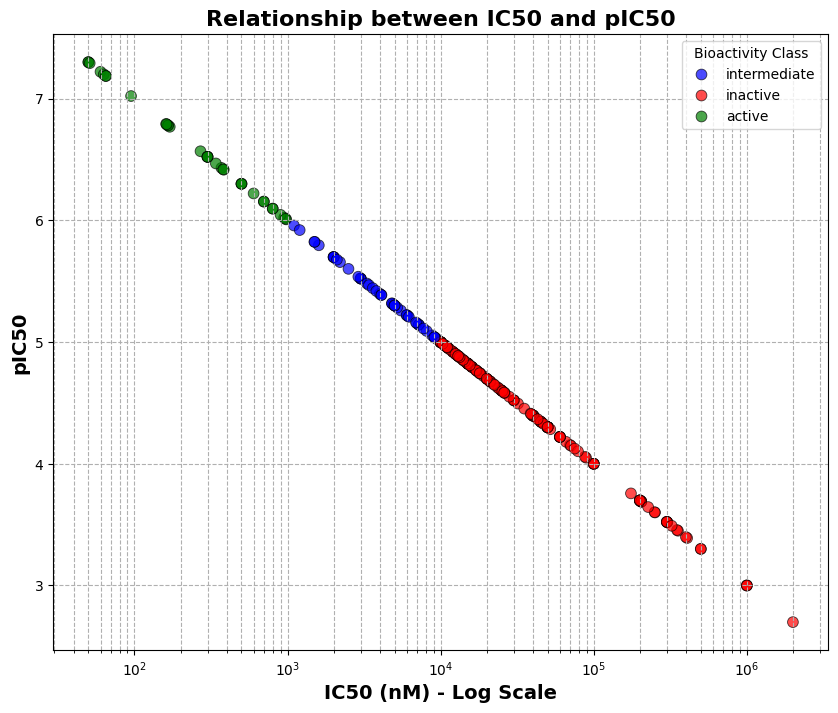


Final DataFrame with pIC50 column:
  molecule_chembl_id  standard_value bioactivity_class     pIC50
0       CHEMBL187579          7200.0      intermediate  5.142668
1       CHEMBL188487          9400.0      intermediate  5.026872
2       CHEMBL185698         13500.0          inactive  4.869666
3       CHEMBL426082         13110.0          inactive  4.882397
4       CHEMBL187717          2000.0      intermediate  5.698970


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_pIC50(df_input):
    df = df_input.copy()
    df['standard_value'] = pd.to_numeric(df['standard_value'], errors='coerce')
    df.dropna(subset=['standard_value'], inplace=True)
    norm_values = []
    for i in df['standard_value']:
        if i > 100000000:
            i = 100000000
        norm_values.append(i)
    df['standard_value_norm'] = norm_values
    df['pIC50'] = -np.log10(df['standard_value_norm'] * (10**-9))
    df.drop(columns=['standard_value_norm'], inplace=True)
    return df

df_pIC50 = calculate_pIC50(df_combined)

print("Generating IC50 vs pIC50 plot...")

plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(
    x='standard_value',
    y='pIC50',
    data=df_pIC50,
    hue='bioactivity_class',
    palette={'active': 'green', 'inactive': 'red', 'intermediate': 'blue'},
    edgecolor='black',
    alpha=0.7,
    s=60
)
plt.xscale('log')

plt.xlabel('IC50 (nM) - Log Scale', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')
plt.title('Relationship between IC50 and pIC50', fontsize=16, fontweight='bold')
plt.grid(True, which="both", ls="--")
plt.legend(title='Bioactivity Class')
plt.show()

print("\nFinal DataFrame with pIC50 column:")
print(df_pIC50[['molecule_chembl_id', 'standard_value', 'bioactivity_class', 'pIC50']].head())

In [ ]:
df_final = df_pIC50

In [ ]:
df_final.pIC50.describe()


,pIC50
count,245.000000
mean,4.894585
std,0.911338
min,2.698970
25%,4.327902
50%,4.823909
75%,5.301030
max,7.301030


In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.00,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.00,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,980.00,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,950.00,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,11200.00,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,380.19,328.466,3.34562,1.0,5.0,6.419999
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.00,222.379,-1.99300,1.0,3.0,6.782516
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,161.00,485.559,0.54470,5.0,7.0,6.793174
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.96,222.379,-1.99300,1.0,3.0,6.779997


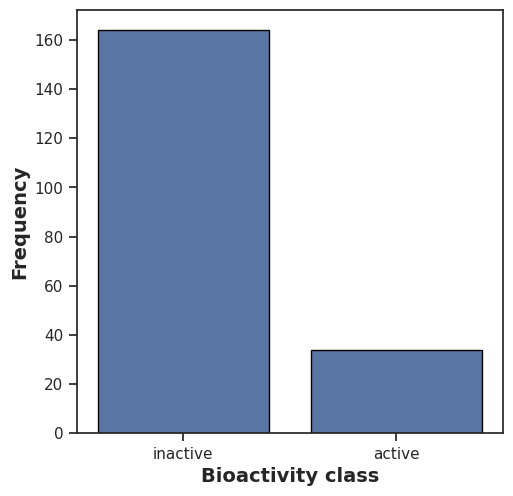

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

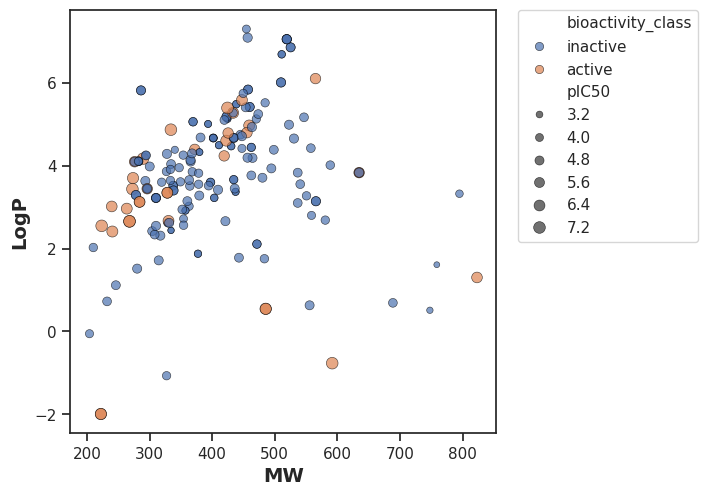

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

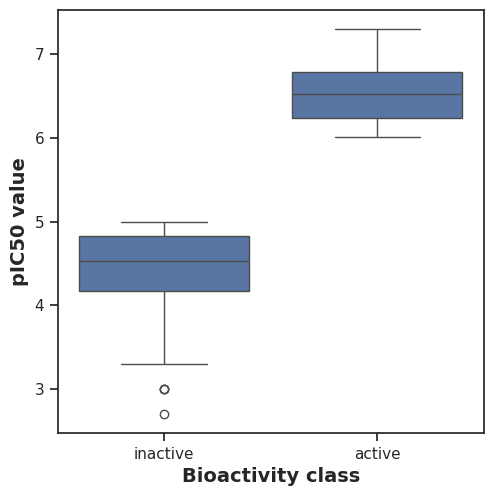

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  seed(1)

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

  stat, p = mannwhitneyu(active, inactive)

  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5576.0,4.760913e-20,0.05,Different distribution (reject H0)


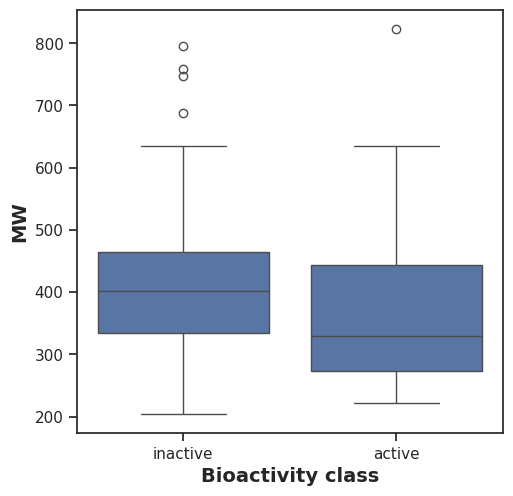

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1996.5,0.009286,0.05,Different distribution (reject H0)


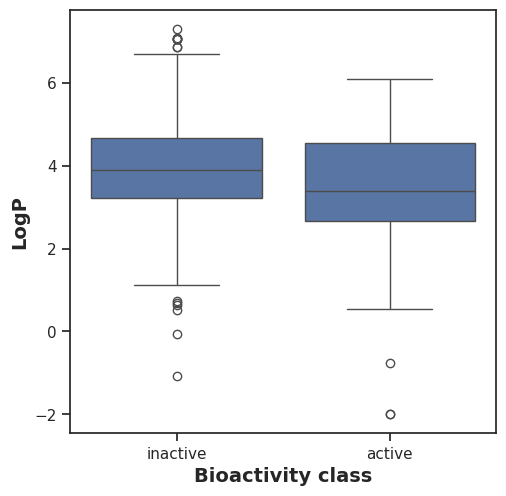

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2222.5,0.063155,0.05,Same distribution (fail to reject H0)


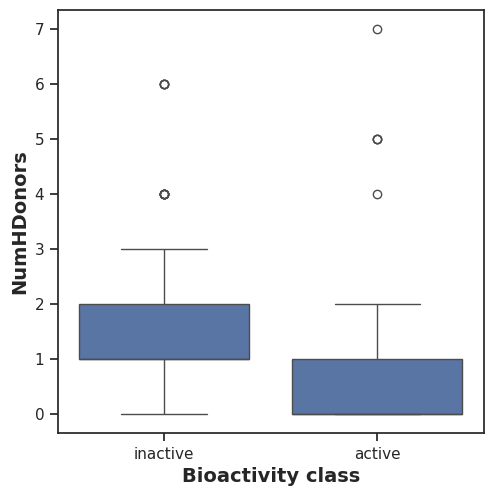

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1831.5,0.001049,0.05,Different distribution (reject H0)


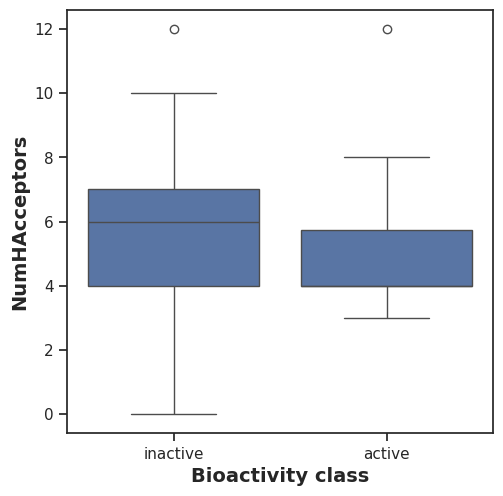

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2033.5,0.012124,0.05,Different distribution (reject H0)


In [ ]:
!zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 11%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 37%)
  adding: bioactivity_data.csv (deflated 91%)
  adding: plot_LogP.pdf (deflated 40%)
  adding: bioactivity_preprocessed_data.csv (deflated 82%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)


**Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited no difference between the actives and inactives while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows statistically significant difference between actives and inactives.

**Enhanced Feature Engineering**

Instead of calculating just four descriptors, calculating all of them

In [ ]:
from rdkit.Chem import Descriptors
import pandas as pd
df_preprocessed = pd.read_csv('bioactivity_preprocessed_data.csv')
def calculate_all_rdkit_descriptors(smiles_list):
  descriptor_names = [name for name, func in Descriptors._descList]
  all_descriptors = []
  for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
      all_descriptors.append([None]*len(descriptor_names))
      continue
    descriptors = [func(mol) for name, func in Descriptors._descList]
    all_descriptors.append(descriptors)
  return pd.DataFrame(all_descriptors, columns=descriptor_names)
df_descriptors = calculate_all_rdkit_descriptors(df_preprocessed['canonical_smiles'])

df_descriptors = df_descriptors.dropna(axis=1, how='any') # Drop columns with any None/NaN
df_descriptors = df_descriptors.loc[:, (df_descriptors != df_descriptors.iloc[0]).any()] # Drop columns with no variance

print(f"Calculated {df_descriptors.shape[1]} descriptors.")
print(df_descriptors.head())

Calculated 172 descriptors.
   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0          12.153169       12.153169           0.226826       -0.597139   
1          13.063283       13.063283           0.136190       -0.590378   
2          12.270381       12.270381           0.284226       -0.509761   
3          12.162811       12.162811           0.410453       -0.436430   
4          12.315033       12.315033           0.092552       -0.725226   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.784329  281.271         270.183  281.080041                  104   
1  0.552472  415.589         407.525  414.927232                  106   
2  0.553064  421.190         409.094  420.981106                  116   
3  0.676575  293.347         282.259  293.051050                  102   
4  0.415474  338.344         328.264  338.036128                  118   

   MaxPartialCharge  ...  fr_priamide  fr_pyridine  fr_sulfide  fr_sulfonamd  \
0 

**Generating** **Molecular** **Fingerprints**

Molecular fingerprints are bit vectors where each bit represents the presence or absence of a specific chemical substructure or feature. They are one of the most powerful and widely used features for machine learning in chemistry

In [ ]:
!conda install -c conda-forge rdkit numpy pandas -y

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit.Chem import AllChem
import pandas as pd
from rdkit import Chem
if 'df_preprocessed' not in globals():
    try:
        df_preprocessed = pd.read_csv('bioactivity_preprocessed_data.csv')
        print("Loaded df_preprocessed from CSV.")
    except FileNotFoundError:
        print("Error: bioactivity_preprocessed_data.csv not found. Please run previous cells.")
        df_preprocessed = None


def generate_morgan_fingerprints(smiles_list, radius=2, n_bits=2048):
    fp_list = []
    for smiles in smiles_list:
        try:
            mol = Chem.MolFromSmiles(smiles)
        except Exception as e:
            print(f"Error processing SMILES '{smiles}': {e}")
            mol = None
        if mol is None:
            fp_list.append(None)
            continue
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
        fp_list.append(list(fp)) # Convert to list of 0s and 1s
    col_names = [f'morgan_{i}' for i in range(n_bits)]
    df_fp = pd.DataFrame(fp_list, columns=col_names).dropna(axis=0).reset_index(drop=True)
    return df_fp

if df_preprocessed is not None:
    df_fingerprints = generate_morgan_fingerprints(df_preprocessed['canonical_smiles'])
    print(df_fingerprints.head())
else:
    print("Fingerprint generation skipped due to missing df_preprocessed.")

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

   morgan_0  morgan_1  morgan_2  morgan_3  morgan_4  morgan_5  morgan_6  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   morgan_7  morgan_8  morgan_9  ...  morgan_2038  morgan_2039  morgan_2040  \
0         0         0         0  ...            0            0            0   
1         0         0         0  ...            0            0            0   
2         0         1         0  ...            0            0            0   
3         0         0         0  ...            0            0            0   
4         0         0         0  ...            0            0            0   

   morgan_2041  morgan_2042  morgan_2043  morgan_2044  morgan_2045  \
0   

 Build Predictive Models (**QSAR Modeling**)
 Quantitative Structure-Activity Relationship model

In [ ]:
X = df_fingerprints

y = df_final['pIC50']

final_df = pd.concat([y, X], axis=1).dropna()
X = final_df.drop('pIC50', axis=1)
y = final_df['pIC50']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Training set size: 196, Test set size: 49


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance on Test Set:")
print(f"R-squared (R²): {r2:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

Model Performance on Test Set:
R-squared (R²): 0.517
Root Mean Squared Error (RMSE): 0.541


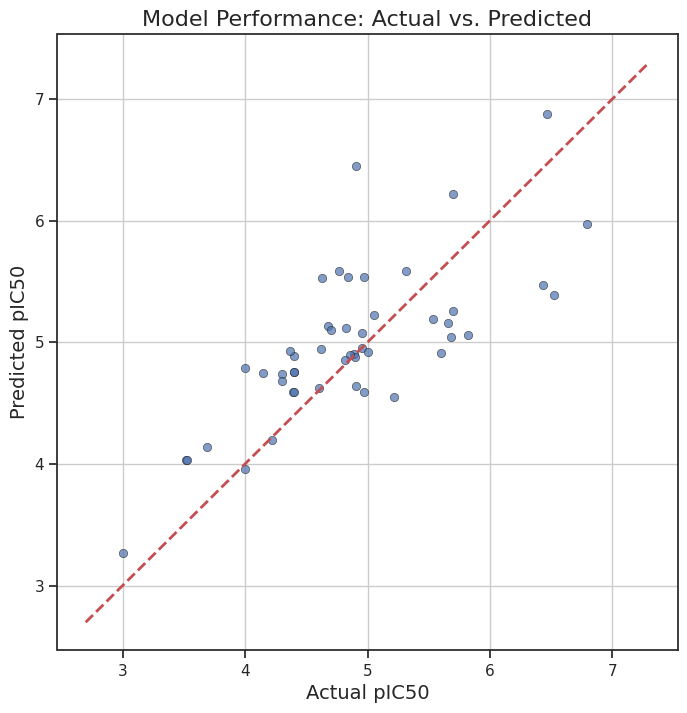

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Add a line for perfect prediction
plt.xlabel("Actual pIC50", fontsize=14)
plt.ylabel("Predicted pIC50", fontsize=14)
plt.title("Model Performance: Actual vs. Predicted", fontsize=16)
plt.grid(True)
plt.show()

Shape of feature matrix (X): (245, 2048)
Shape of target vector (y): (245,)

Model Performance on Test Set:
R-squared (R²): 0.517
Root Mean Squared Error (RMSE): 0.541


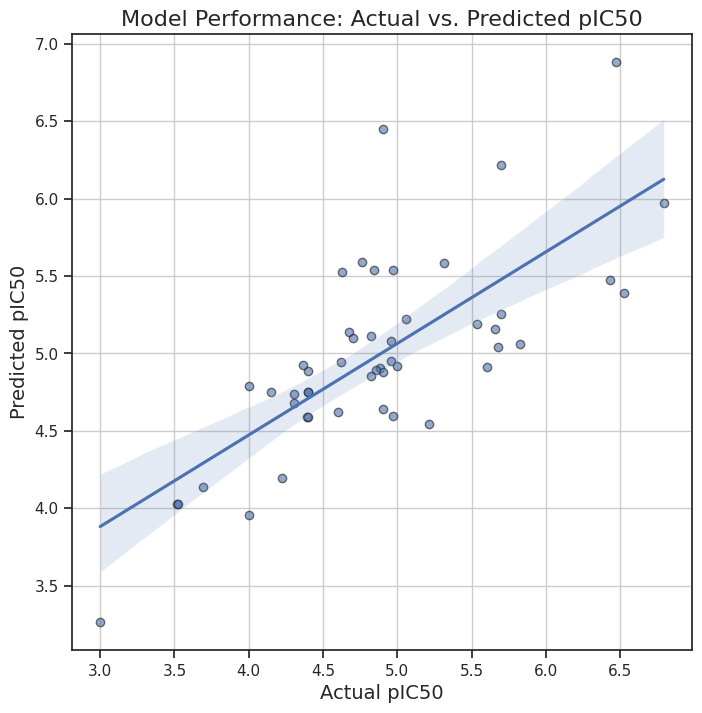

In [ ]:
X = df_fingerprints
y = df_final['pIC50']

# --- Important Sanity Check ---
# The number of rows in X and y must match. Invalid SMILES might have been dropped.
# Let's combine them and drop any rows with missing data to ensure they align perfectly.
final_model_df = pd.concat([y, X], axis=1).dropna()

X = final_model_df.drop('pIC50', axis=1)
y = final_model_df['pIC50']

print(f"Shape of feature matrix (X): {X.shape}")
print(f"Shape of target vector (y): {y.shape}")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nModel Performance on Test Set:")
print(f"R-squared (R²): {r2:.3f}") # Closer to 1 is better
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}") # Lower is better

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6, 'edgecolor':'k'})
plt.xlabel("Actual pIC50", fontsize=14)
plt.ylabel("Predicted pIC50", fontsize=14)
plt.title("Model Performance: Actual vs. Predicted pIC50", fontsize=16)
plt.grid(True)
plt.show()

# Task
Explain the provided Python code for training a RandomForestRegressor model, then modify it to use GridSearchCV and RandomizedSearchCV for hyperparameter tuning, evaluate the performance of the model trained with the best hyperparameters from each method, and compare the results with the original model.

## Define parameter grids

### Subtask:
Define the hyperparameter grids for GridSearchCV and RandomizedSearchCV.


**Reasoning**:
Define the hyperparameter grids for GridSearchCV and RandomizedSearchCV as dictionaries according to the instructions.



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_param_grid = {
    'n_estimators': [100, 200, 300, 500, 800],
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10]
}

## Perform gridsearchcv

### Subtask:
Use GridSearchCV to search for the best hyperparameters for the RandomForestRegressor model.


**Reasoning**:
Use GridSearchCV to find the best hyperparameters for the RandomForestRegressor model.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

print("\nBest cross-validation score found by GridSearchCV:")
print(grid_search.best_score_)

Best hyperparameters found by GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Best cross-validation score found by GridSearchCV:
0.6065429976757726


**Reasoning**:
The previous command failed because X_train and y_train were not defined in the current session. Need to reload the data and perform the train-test split again before running GridSearchCV.



In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

if 'df_preprocessed' not in globals():
    try:
        df_preprocessed = pd.read_csv('bioactivity_preprocessed_data.csv')
        print("Loaded df_preprocessed from CSV.")
    except FileNotFoundError:
        print("Error: bioactivity_preprocessed_data.csv not found.")
        df_preprocessed = None

def generate_morgan_fingerprints(smiles_list, radius=2, n_bits=2048):
    fp_list = []
    for smiles in smiles_list:
        try:
            mol = Chem.MolFromSmiles(smiles)
        except Exception as e:
            print(f"Error processing SMILES '{smiles}': {e}")
            mol = None
        if mol is None:
            fp_list.append(None)
            continue
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
        fp_list.append(list(fp))
    col_names = [f'morgan_{i}' for i in range(n_bits)]
    df_fp = pd.DataFrame(fp_list, columns=col_names) # Don't dropna here yet
    return df_fp

if df_preprocessed is not None:
    df_fingerprints = generate_morgan_fingerprints(df_preprocessed['canonical_smiles'])

    # Ensure df_fingerprints and df_preprocessed have the same index before combining
    df_preprocessed = df_preprocessed.reset_index(drop=True)
    df_fingerprints = df_fingerprints.reset_index(drop=True)


    # Combine fingerprints with pIC50 and handle missing values
    # First, calculate pIC50 if not already in df_preprocessed
    if 'pIC50' not in df_preprocessed.columns:
        def calculate_pIC50(df_input):
            df = df_input.copy()
            df['standard_value'] = pd.to_numeric(df['standard_value'], errors='coerce')
            df.dropna(subset=['standard_value'], inplace=True)
            norm_values = []
            for i in df['standard_value']:
                if i > 100000000:
                    i = 100000000
                norm_values.append(i)
            df['standard_value_norm'] = norm_values
            df['pIC50'] = -np.log10(df['standard_value_norm'] * (10**-9))
            df.drop(columns=['standard_value_norm'], inplace=True)
            return df

        df_preprocessed = calculate_pIC50(df_preprocessed)
        print("Calculated pIC50.")

    # Align df_fingerprints to df_preprocessed after pIC50 calculation and dropping NaNs
    # This ensures that the fingerprints correspond to the rows that have pIC50 values
    aligned_fingerprints = df_fingerprints.loc[df_preprocessed.index].reset_index(drop=True)


    X = aligned_fingerprints
    y = df_preprocessed['pIC50']

    # Drop rows with NaN values in X after generating fingerprints
    # This handles cases where fingerprint generation might fail for a SMILES
    nan_rows_X = X.isnull().any(axis=1)
    if nan_rows_X.any():
        print(f"Dropping {nan_rows_X.sum()} rows due to NaN values in fingerprints.")
        X = X[~nan_rows_X].reset_index(drop=True)
        y = y[~nan_rows_X].reset_index(drop=True)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

    rf = RandomForestRegressor(random_state=42)

    # Define param_grid - ensure it is defined if not already in scope
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }


    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

    grid_search.fit(X_train, y_train)

    print("Best hyperparameters found by GridSearchCV:")
    print(grid_search.best_params_)

    print("\nBest cross-validation score found by GridSearchCV:")
    print(grid_search.best_score_)

else:
    print("GridSearchCV skipped due to missing data.")


Training set size: 196, Test set size: 49
Best hyperparameters found by GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Best cross-validation score found by GridSearchCV:
0.6065429976757726


## Evaluate gridsearchcv model

### Subtask:
Evaluate the model trained with the best hyperparameters found by GridSearchCV on the test set.


**Reasoning**:
Evaluate the model trained with the best hyperparameters found by GridSearchCV on the test set by calculating R-squared and RMSE.



In [ ]:
# Get the best estimator from GridSearchCV
best_grid_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_grid = best_grid_model.predict(X_test)

# Calculate R-squared and RMSE
r2_grid = r2_score(y_test, y_pred_grid)
rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))

# Print the results
print(f"GridSearchCV Model Performance on Test Set:")
print(f"R-squared (R²): {r2_grid:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_grid:.3f}")

GridSearchCV Model Performance on Test Set:
R-squared (R²): 0.533
Root Mean Squared Error (RMSE): 0.532


## Perform randomizedsearchcv

### Subtask:
Use RandomizedSearchCV to search for the best hyperparameters for the RandomForestRegressor model.


**Reasoning**:
Import necessary libraries and perform RandomizedSearchCV to find the best hyperparameters for the RandomForestRegressor model.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best hyperparameters found by RandomizedSearchCV:")
print(random_search.best_params_)

print("\nBest cross-validation score found by RandomizedSearchCV:")
print(random_search.best_score_)

Best hyperparameters found by RandomizedSearchCV:
{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}

Best cross-validation score found by RandomizedSearchCV:
0.6015803977826104


## Evaluate randomizedsearchcv model

### Subtask:
Evaluate the model trained with the best hyperparameters found by RandomizedSearchCV on the test set.


**Reasoning**:
Evaluate the model trained with the best hyperparameters found by RandomizedSearchCV on the test set by making predictions and calculating R-squared and RMSE.



In [ ]:
# Get the best estimator from RandomizedSearchCV
best_random_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_random = best_random_model.predict(X_test)

# Calculate R-squared and RMSE
r2_random = r2_score(y_test, y_pred_random)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))

# Print the results
print(f"RandomizedSearchCV Model Performance on Test Set:")
print(f"R-squared (R²): {r2_random:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_random:.3f}")

RandomizedSearchCV Model Performance on Test Set:
R-squared (R²): 0.546
Root Mean Squared Error (RMSE): 0.524


## Compare model performance

### Subtask:
Compare the performance of the three models (current, GridSearchCV, and RandomizedSearchCV) based on R-squared and RMSE.


**Reasoning**:
Print the performance metrics for all three models (original, GridSearchCV, and RandomizedSearchCV) to compare their R-squared and RMSE values and then interpret the results.



In [ ]:
print("Performance Comparison:")
print("-" * 30)
print(f"Original Model:")
print(f"  R-squared (R²): {r2:.3f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.3f}")
print("-" * 30)
print(f"GridSearchCV Model:")
print(f"  R-squared (R²): {r2_grid:.3f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_grid:.3f}")
print("-" * 30)
print(f"RandomizedSearchCV Model:")
print(f"  R-squared (R²): {r2_random:.3f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_random:.3f}")
print("-" * 30)

print("\nInterpretation:")
print("Based on the R-squared values, which represent the proportion of the variance in the dependent variable that is predictable from the independent variables, a higher value indicates a better fit. Based on the RMSE values, which measure the average magnitude of the errors, a lower value indicates a better fit.")
print(f"The Original Model achieved an R-squared of {r2:.3f} and RMSE of {rmse:.3f}.")
print(f"The GridSearchCV Model achieved an R-squared of {r2_grid:.3f} and RMSE of {rmse_grid:.3f}.")
print(f"The RandomizedSearchCV Model achieved an R-squared of {r2_random:.3f} and RMSE of {rmse_random:.3f}.")

# Determine which model performed best
best_r2_model = "Original" if r2 >= r2_grid and r2 >= r2_random else ("GridSearchCV" if r2_grid >= r2 and r2_grid >= r2_random else "RandomizedSearchCV")
best_rmse_model = "Original" if rmse <= rmse_grid and rmse <= rmse_random else ("GridSearchCV" if rmse_grid <= rmse and rmse_grid <= rmse_random else "RandomizedSearchCV")

print(f"\nBased on R-squared, the best performing model is: {best_r2_model}")
print(f"Based on RMSE, the best performing model is: {best_rmse_model}")

Performance Comparison:
------------------------------
Original Model:
  R-squared (R²): 0.517
  Root Mean Squared Error (RMSE): 0.541
------------------------------
GridSearchCV Model:
  R-squared (R²): 0.533
  Root Mean Squared Error (RMSE): 0.532
------------------------------
RandomizedSearchCV Model:
  R-squared (R²): 0.546
  Root Mean Squared Error (RMSE): 0.524
------------------------------

Interpretation:
Based on the R-squared values, which represent the proportion of the variance in the dependent variable that is predictable from the independent variables, a higher value indicates a better fit. Based on the RMSE values, which measure the average magnitude of the errors, a lower value indicates a better fit.
The Original Model achieved an R-squared of 0.517 and RMSE of 0.541.
The GridSearchCV Model achieved an R-squared of 0.533 and RMSE of 0.532.
The RandomizedSearchCV Model achieved an R-squared of 0.546 and RMSE of 0.524.

Based on R-squared, the best performing model is:

## Summary:

### Data Analysis Key Findings

*   The best hyperparameters found by GridSearchCV for the `RandomForestRegressor` were `{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}`. The best cross-validation score obtained was approximately 0.6065.
*   The model trained with the best hyperparameters from GridSearchCV achieved an R-squared score of 0.533 and an RMSE of 0.532 on the test set.
*   The best hyperparameters found by RandomizedSearchCV were `{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}`. The best cross-validation score achieved was approximately 0.6016.
*   The model trained with the best hyperparameters from RandomizedSearchCV achieved an R-squared score of 0.546 and an RMSE of 0.524 on the test set.
*   Comparing the three models on the test set:
    *   Original Model: R-squared = 0.517, RMSE = 0.541
    *   GridSearchCV Model: R-squared = 0.533, RMSE = 0.532
    *   RandomizedSearchCV Model: R-squared = 0.546, RMSE = 0.524
*   Based on both R-squared (higher is better) and RMSE (lower is better), the RandomizedSearchCV model performed the best on the test set.

### Insights or Next Steps

*   Both GridSearchCV and RandomizedSearchCV improved the model's performance compared to the original model, indicating the value of hyperparameter tuning.
*   RandomizedSearchCV found a set of hyperparameters that resulted in slightly better performance on the test set than GridSearchCV in this specific case, potentially due to exploring a larger hyperparameter space more efficiently within the given iterations.
